In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [11]:
df = pd.read_csv("zksync_calldata.csv")

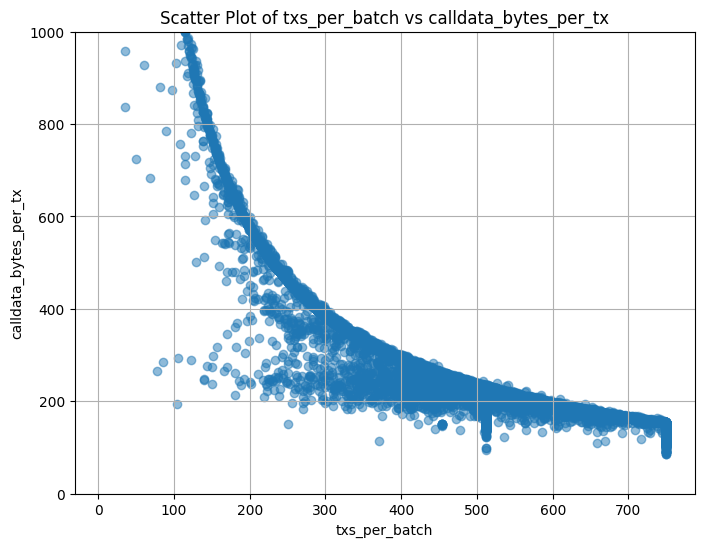

In [12]:
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.scatter(df['txs_per_batch'], df['calldata_bytes_per_tx'], alpha=0.5)  # alpha controls point transparency
plt.title('Scatter Plot of txs_per_batch vs calldata_bytes_per_tx')
plt.xlabel('txs_per_batch')
plt.ylabel('calldata_bytes_per_tx')
plt.grid(True)  # Add a grid (optional)
plt.ylim(0, 1000)
plt.show()

In [13]:
x = df['txs_per_batch'].values
y = df['calldata_bytes_per_tx'].values

# Define the function you want to fit (a / (b * x))
def model(x, a, b):
    return a / (b * x)

# Perform the curve fit
params, covariance = curve_fit(model, x, y)

# Extract the fitted parameters
a_fit, b_fit = params

# Generate y-values for the fitted curve
y_fit = model(x, a_fit, b_fit)  


/var/folders/71/447v2sxs6p38v1f_31zf3x3r0000gn/T/ipykernel_95998/2617263312.py:12: RuntimeWarning: divide by zero encountered in divide
  return a / (np.power(x, b)) + c
/var/folders/71/447v2sxs6p38v1f_31zf3x3r0000gn/T/ipykernel_95998/2617263312.py:12: RuntimeWarning: overflow encountered in divide
  return a / (np.power(x, b)) + c


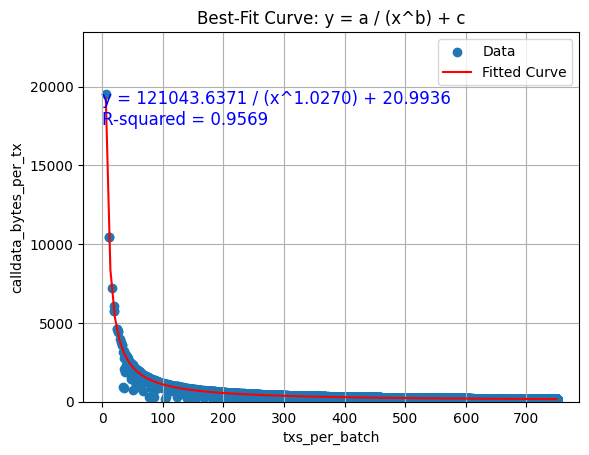

Fitted parameters: a = 121043.6371, b = 1.0270, c = 20.9936
Fitted equation: y = 121043.6371 / (x^1.0270) + 20.9936
R-squared value: 0.9569


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

# Sample data (replace with your actual data)
x_data = df['txs_per_batch'].values
y_data = df['calldata_bytes_per_tx'].values

# Define the model function (y = a / (x^b) + c)
def model(x, a, b, c):
    return a / (np.power(x, b)) + c

# Perform the curve fit
params, covariance = curve_fit(model, x_data, y_data, maxfev=10000)  # maxfev is increased for better convergence

# Extract the fitted parameters
a_fit, b_fit, c_fit = params

# Generate y-values for the fitted curve
y_fit = model(x_data, a_fit, b_fit, c_fit)

# Calculate the R-squared value
slope, intercept, r_value, p_value, std_err = stats.linregress(y_data, y_fit)
r_squared = r_value**2

# Create a scatter plot of the data
plt.scatter(x_data, y_data, label='Data')

# Plot the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit_curve = model(x_fit, a_fit, b_fit, c_fit)
plt.plot(x_fit, y_fit_curve, label='Fitted Curve', color='r')

# Calculate the fitted equation
equation = f'y = {a_fit:.4f} / (x^{b_fit:.4f}) + {c_fit:.4f}'

# Set y-axis limit (you can adjust this)
plt.ylim(0, max(y_data) * 1.2)

# Add the equation and R-squared value as text annotations on the plot
text_equation = f'{equation}\nR-squared = {r_squared:.4f}'
plt.text(0.1, max(y_data) * 0.9, text_equation, fontsize=12, color='b')

# Add legend
plt.legend()

# Set labels and title
plt.xlabel('txs_per_batch')
plt.ylabel('calldata_bytes_per_tx')
plt.title('Best-Fit Curve: y = a / (x^b) + c')
plt.grid(True)

# Show the plot
plt.show()

# Display the fitted parameters, equation, and R-squared value
print(f"Fitted parameters: a = {a_fit:.4f}, b = {b_fit:.4f}, c = {c_fit:.4f}")
print(f"Fitted equation: {equation}")
print(f"R-squared value: {r_squared:.4f}")
